In [2]:
import numpy as np
import os,sys,glob,pdb,pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
sys.path.append('pyutils')

#stuff = taurus_functions.give_me_data()


In [6]:
#thisiso = pd.read_csv('parsec_isochrones.txt')
#print(thisiso.Age)
#print(len(thisiso.Age))
#ages = thisiso.Age/1.0e6 
#print(ages)
#model_array += (thisiso.copy(),)
#pickle.dump((ages,model_array),open('stacked_parsec_models.pkl','ab'))
model_ages,model_array=pickle.load(open('stacked_parsec_models.pkl','rb'))


In [5]:
nsamples = 2000000
random_age = np.random.uniform(1.,3000,size=nsamples)
random_mass = np.random.uniform(0.1,1.0,size=nsamples)
SORTED_random_ages = np.sort(random_age)
print(SORTED_random_ages)


[1.00071820e+00 1.00161073e+00 1.00264634e+00 ... 2.99999646e+03
 2.99999777e+03 2.99999797e+03]


Up to 100000
Up to 200000
Up to 300000
Up to 400000
Up to 500000
Up to 600000
Up to 700000
Up to 800000
Up to 900000
Up to 1000000
Up to 1100000
Up to 1200000
Up to 1300000
Up to 1400000
Up to 1500000
Up to 1600000
Up to 1700000
Up to 1800000
Up to 1900000
Up to 2000000
10.0


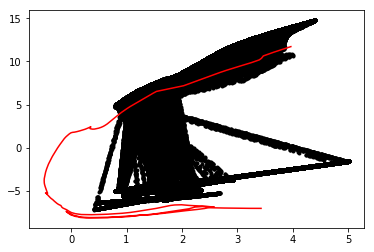

In [8]:
model_stars = np.zeros((nsamples,5),dtype=float)

#refArray = np.random.random(16);
#myArray = np.random.random(1000);


#def Nearest_Point(array, value):
    #idx = (np.abs(array-value)).argmin()
    #return idx;

#for value in np.nditer(random_age):
    #index = find_nearest(refArray, value);
    #print(index);

for i in range(len(random_age)):
    low_indx = np.where(model_ages <= random_age[i])[0][-1]
    high_indx = np.where(model_ages > random_age[i])[0][0]
    
    #for each of the two nearst model above, interpolated G/R/B for the the input random mass.
    lowmodel  = model_array[low_indx]
    highmodel = model_array[high_indx]
    
    ##GMAG for the random mass for each model
    low_gmag = np.interp(random_mass[i],lowmodel.Mass,lowmodel.Gmag)
    low_bpmag = np.interp(random_mass[i],lowmodel.Mass,lowmodel.G_BPmag)
    low_rpmag = np.interp(random_mass[i],lowmodel.Mass,lowmodel.G_RPmag)
    high_gmag = np.interp(random_mass[i],highmodel.Mass,highmodel.Gmag)
    high_bpmag = np.interp(random_mass[i],highmodel.Mass,highmodel.G_BPmag)
    high_rpmag = np.interp(random_mass[i],highmodel.Mass,highmodel.G_RPmag)
    
    ##Now interpolate these two to the random age
    model_stars[i,0] =(random_age[i])
    model_stars[i,1] =(random_mass[i])
    model_stars[i,2] = np.interp(random_age[i],[model_ages[low_indx],model_ages[high_indx]],[low_gmag,high_gmag])
    model_stars[i,3] = np.interp(random_age[i],[model_ages[low_indx],model_ages[high_indx]],[low_bpmag,high_bpmag])
    model_stars[i,4] = np.interp(random_age[i],[model_ages[low_indx],model_ages[high_indx]],[low_rpmag,high_rpmag])

    if np.mod(i+1,100000) == 0: print('Up to ' + str(i+1))

                       

pickle.dump(model_stars,open('Random_sample_180625.pkl','wb'))
            
                       #plt.hist(model_stars[:,1])
#plt.show()
plt.plot(model_stars[:,3]-model_stars[:,4], model_stars[:,2], '.k')
#plt.show()
##print(model_ages[340])
ttt = 100
print(model_ages[ttt])
plt.plot(model_array[ttt].G_BPmag - model_array[ttt].G_RPmag, model_array[ttt].Gmag,'r')

plt.show()

    
    

    

In [9]:
avg_gmag = model_stars[i,2] / nsamples
avg_bpmag = model_stars[i,3] / nsamples
avg_rpmag = model_stars[i,4] / nsamples
